# PHP - Pulsating Heat Pipe [DI-Water, 40FR]
Data collection and preparation for data analysis and machine learning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
import glob
from ipynb.fs.full.mdf import DataChop, DataArrange, DataETL, DataPropAvg, GibbsFE, BestTP

### Menualy Defined Functions (MDF)
[more details: help(function_name)]
1. DataETL
2. DataChop
3. DataArrange
4. DataPropAvg
5. GibbsFE
6. BestTP

## Data loading

In [2]:
# loading and cleaning data
df = DataETL('data/di_water_exp/40_FR/')

In [3]:
# adding calculated GFE in the main dataframe
df= GibbsFE(df)
df

,Time (Min),Tc - AVG (oC),Te - AVG (oC),Pressure (mm of Hg),Te - Tc (oC),Q (W),Resistance (oC/W),GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,0.0,28.00,28.000000,210.00,0.000000,80,0.000000,-3187.408910,-3187.408910,0.000000
1,0.5,28.00,28.800000,210.00,0.800000,80,0.010000,-3195.876209,-3187.408910,-8.467299
2,1.0,28.25,29.600000,210.00,1.350000,80,0.016875,-3204.343508,-3190.054941,-14.288567
3,1.5,28.75,31.200000,210.00,2.450000,80,0.030625,-3221.278106,-3195.347003,-25.931104
4,2.0,29.00,32.800000,210.00,3.800000,80,0.047500,-3238.212704,-3197.993034,-40.219671
...,...,...,...,...,...,...,...,...,...,...
462,48.5,70.50,95.000000,870.34,24.500000,80,0.306250,455.226743,424.931876,30.294867
463,49.0,71.00,94.000000,870.34,23.000000,80,0.287500,453.990218,425.550139,28.440079
464,49.5,70.50,95.333333,870.34,24.833333,80,0.310417,455.638918,424.931876,30.707042
465,50.0,70.00,94.333333,870.34,24.333333,80,0.304167,454.402393,424.313614,30.088779


## EDA

In [4]:
df.describe()

,Time (Min),Tc - AVG (oC),Te - AVG (oC),Pressure (mm of Hg),Te - Tc (oC),Resistance (oC/W),GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
count,466.000000,466.000000,466.000000,466.000000,466.000000,467.000000,466.000000,466.000000,466.000000
mean,29.047210,58.051502,77.176252,605.596867,19.124750,0.239092,-768.021624,-733.595656,-34.425968
std,17.110643,14.565002,17.527635,203.304270,5.807716,0.072552,1042.433373,1000.439617,51.805504
min,0.000000,25.750000,27.666667,210.000000,0.000000,0.000000,-3282.666025,-3213.869219,-148.433677
25%,14.500000,46.000000,71.000000,435.000000,16.400000,0.205000,-1572.659412,-1473.915244,-72.807482
50%,29.000000,64.500000,84.800000,635.000000,20.075000,0.251250,-502.379490,-476.488636,-23.675594
75%,43.500000,69.750000,90.000000,735.000000,23.200000,0.290000,-60.529408,-56.534450,0.000000
max,60.500000,79.000000,95.333333,1060.000000,30.583333,0.382292,998.822011,932.828157,67.144074


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time (Min)           466 non-null    float64
 1   Tc - AVG (oC)        466 non-null    float64
 2   Te - AVG (oC)        466 non-null    float64
 3   Pressure (mm of Hg)  466 non-null    float64
 4   Te - Tc (oC)         466 non-null    float64
 5   Q (W)                467 non-null    object 
 6   Resistance (oC/W)    467 non-null    float64
 7   GFE [KJ/mol]         466 non-null    float64
 8   GFE_Tc [KJ/mol]      466 non-null    float64
 9   dG [KJ/mol]          466 non-null    float64
dtypes: float64(9), object(1)
memory usage: 36.6+ KB


<Axes: title={'center': 'Tc & Te'}, xlabel='Data', ylabel='Temperature[C]'>

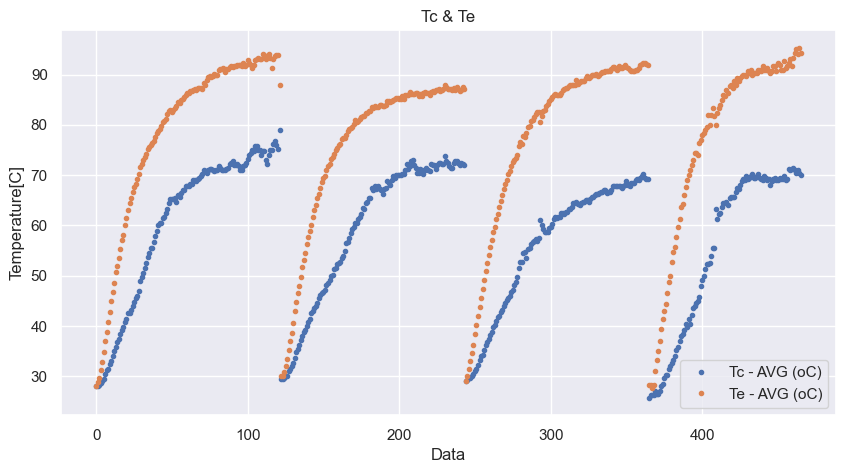

In [6]:
df[['Tc - AVG (oC)', 'Te - AVG (oC)']].plot(style='.',
                                                      figsize=(10,5),
                                                      title = 'Tc & Te',
                                                      xlabel='Data',
                                                      ylabel='Temperature[C]')

<Axes: title={'center': 'Thermal Performance'}, xlabel='Data', ylabel='Thermal Resistance [C/W]'>

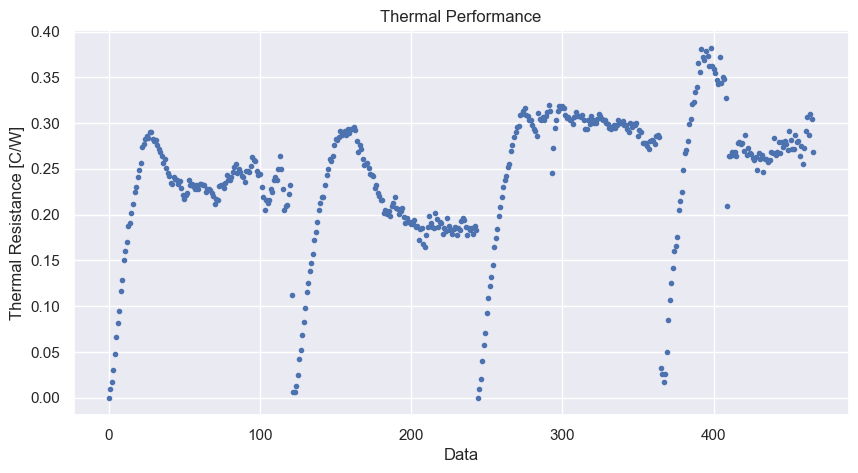

In [7]:
df['Resistance (oC/W)'].plot(style='.',
                             figsize=(10,5),
                             title =  'Thermal Performance',
                             xlabel='Data',
                             ylabel='Thermal Resistance [C/W]')

<Axes: title={'center': 'Pressure'}, xlabel='Data', ylabel='Pressure [mmHg]'>

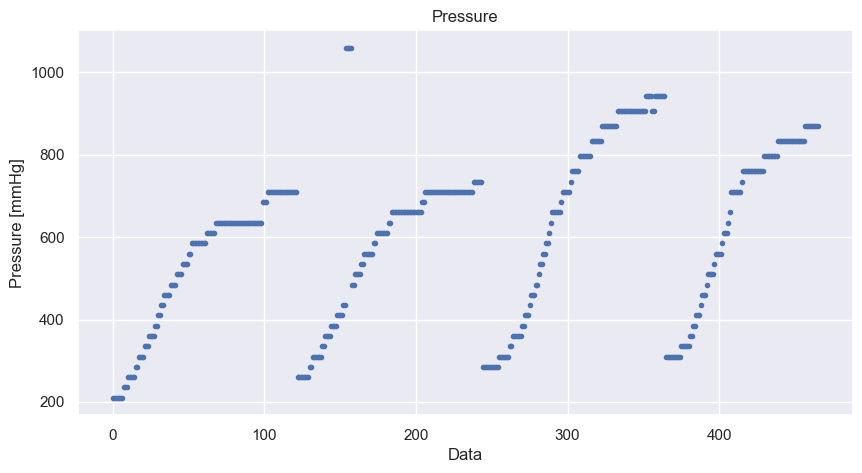

In [8]:
df['Pressure (mm of Hg)'].plot(style='.',
                                 figsize=(10,5),
                                 title='Pressure',
                                 xlabel='Data',
                                 ylabel='Pressure [mmHg]')

<Axes: title={'center': 'Temperature Difference'}, xlabel='Data', ylabel='Temperature Difference[C]'>

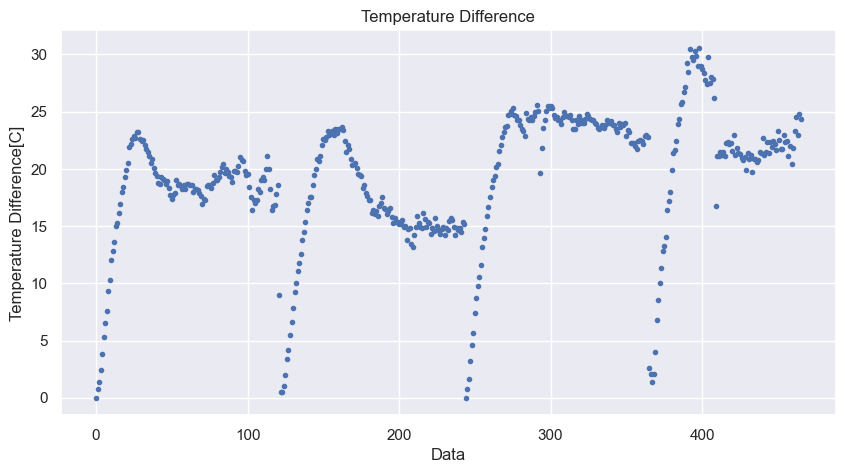

In [9]:
df['Te - Tc (oC)'].plot(style='.',
                        figsize=(10,5),
                        title=('Temperature Difference'),
                        xlabel='Data',
                        ylabel='Temperature Difference[C]')

<Axes: title={'center': 'Gibbs Free Energy'}, xlabel='Data', ylabel='Change in Gibbs Free Energy [KJ/mol]'>

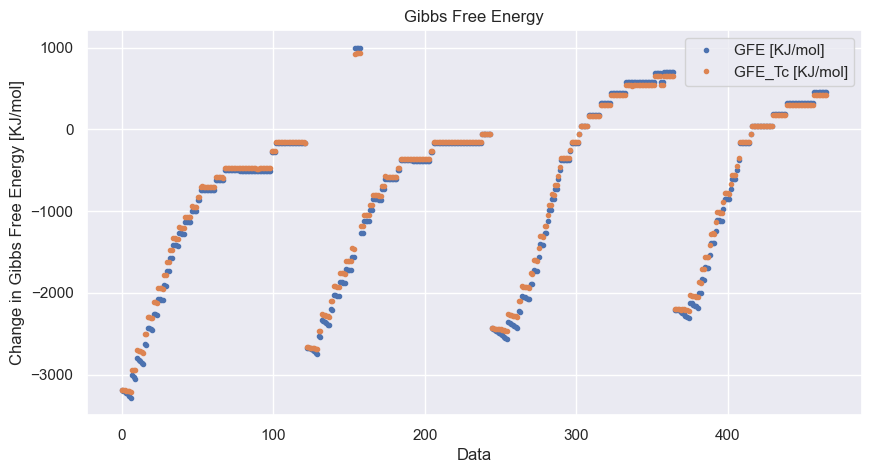

In [10]:
df[['GFE [KJ/mol]', 'GFE_Tc [KJ/mol]']].plot(style='.',
                        figsize=(10,5),
                        title = 'Gibbs Free Energy',
                        xlabel = 'Data',
                        ylabel = 'Change in Gibbs Free Energy [KJ/mol]')

## Data Grouping and Arranging

In [11]:
df_mean, df_std = DataArrange(df,'data/di_water_exp/40_FR/')

/Users/nirmal/Documents/data_science/PulseHeatPipe/mdf.ipynb:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  },


In [12]:
df_mean

,Te - AVG (oC),Time (Min),Tc - AVG (oC),Pressure (mm of Hg),Te - Tc (oC),Resistance (oC/W),GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,27.666667,1.000000,26.250000,310.000000,1.416667,0.017708,-2209.833472,-2199.426478,-10.406995
1,28.000000,0.000000,28.000000,210.000000,0.000000,0.000000,-3187.408910,-3187.408910,0.000000
2,28.333333,0.666667,26.083333,310.000000,2.250000,0.028125,-2214.730882,-2198.202125,-16.528756
3,28.800000,0.500000,28.000000,210.000000,0.800000,0.010000,-3195.876209,-3187.408910,-8.467299
4,29.000000,0.000000,29.000000,285.000000,0.000000,0.000000,-2430.851396,-2430.851396,0.000000
...,...,...,...,...,...,...,...,...,...
221,93.800000,58.333333,75.333333,710.000000,18.466667,0.230833,-167.462381,-159.034879,-8.427502
222,94.000000,53.666667,73.250000,763.446667,20.750000,0.259375,39.627637,36.118359,3.509278
223,94.333333,49.000000,70.500000,870.340000,23.833333,0.297917,454.402393,424.931876,29.470517
224,95.000000,48.500000,70.500000,870.340000,24.500000,0.306250,455.226743,424.931876,30.294867


In [13]:
df_std

,Te - AVG (oC),Time (Min),Tc - AVG (oC),Pressure (mm of Hg),Te - Tc (oC),Resistance (oC/W),GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
2,28.333333,0.763763,0.288675,0.000000,0.288675,0.003608,0.000000,2.120640,2.120640
6,30.000000,0.288675,0.144338,14.433757,0.144338,0.001804,133.593510,134.534389,0.940880
21,37.000000,0.288675,2.362908,50.000000,2.362908,0.029536,502.917291,504.688198,13.301729
32,43.000000,0.353553,2.828427,35.355339,2.828427,0.035355,300.428190,310.592307,10.164116
63,57.200000,0.000000,0.353553,0.000000,0.353553,0.004419,0.000000,2.597243,2.597243
...,...,...,...,...,...,...,...,...,...
216,93.000000,4.034229,1.947220,65.458531,1.947220,0.024340,253.053104,238.557074,14.506581
217,93.200000,2.828427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
221,93.800000,2.466441,0.629153,0.000000,0.629153,0.007864,0.000000,0.287122,0.287122
222,94.000000,4.163332,1.984313,92.572342,1.984313,0.024804,358.848522,337.257858,21.591385


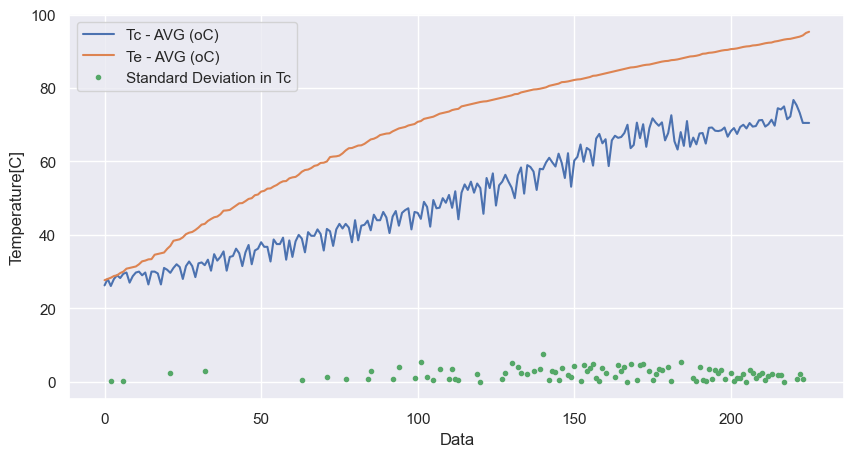

In [14]:
df_mean[['Tc - AVG (oC)', 'Te - AVG (oC)']].plot(style='-',
        figsize=(10,5))
df_std['Tc - AVG (oC)'].plot(style='.', xlabel='Data', ylabel='Temperature[C]', label='Standard Deviation in Tc')
plt.legend()

## Expanded Uncertainty [EU] calculation and plotting

PHP - Tc and Te temperature

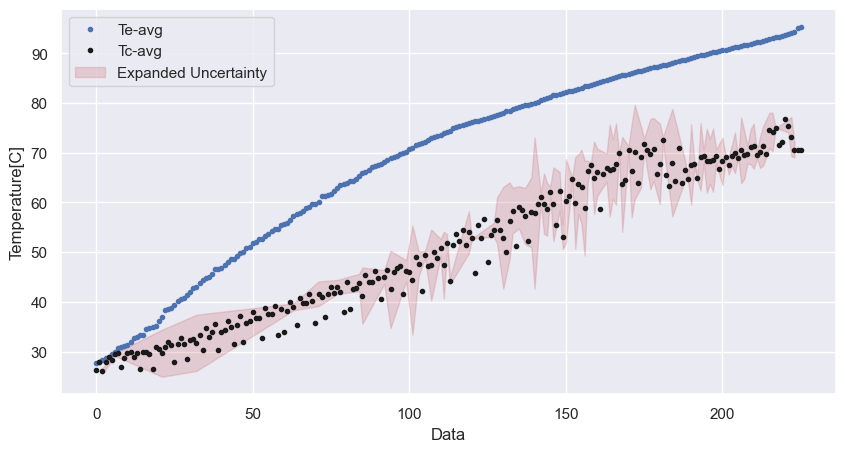

In [15]:
# plot of Tc and Te average tempratures with calculated expanded uncertainty with 95% confidence interval
plt.figure(figsize=(10,5));
plt.plot(df_mean['Te - AVG (oC)'].index, df_mean['Te - AVG (oC)'], '.b', label='Te-avg')
plt.plot(df_mean['Tc - AVG (oC)'].index, df_mean['Tc - AVG (oC)'], '.k', label='Tc-avg' )
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std['Tc - AVG (oC)'].index, df_mean_idx['Tc - AVG (oC)'] - 2* df_std['Tc - AVG (oC)'], df_mean_idx['Tc - AVG (oC)'] + 2* df_std['Tc - AVG (oC)'],color='r', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Data')
plt.ylabel('Temperature[C]')
plt.legend()


PHP - Pressure

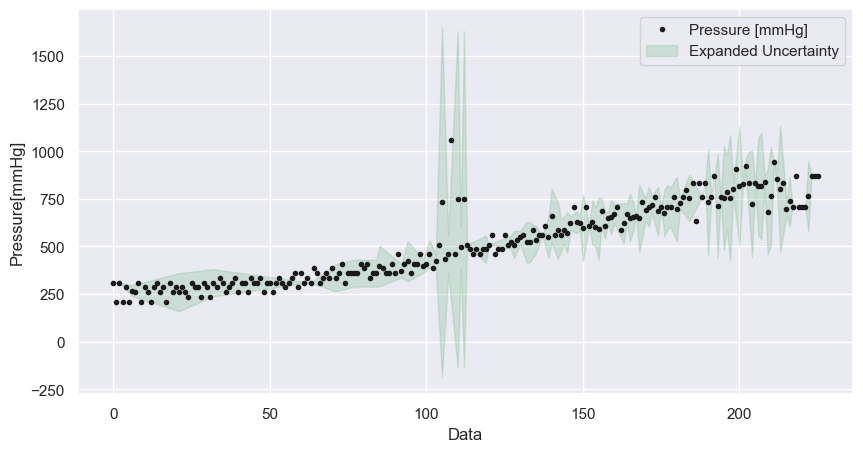

In [16]:
# pressure graph with EU
plt.figure(figsize=(10,5));
plt.plot(df_mean['Pressure (mm of Hg)'].index, df_mean['Pressure (mm of Hg)'], '.k', label='Pressure [mmHg]' )
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std['Pressure (mm of Hg)'].index, df_mean_idx['Pressure (mm of Hg)'] - 2* df_std['Pressure (mm of Hg)'], df_mean_idx['Pressure (mm of Hg)'] + 2* df_std['Pressure (mm of Hg)'],color='g', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Data')
plt.ylabel('Pressure[mmHg]')
plt.legend()

PHP - Thermal Resistance

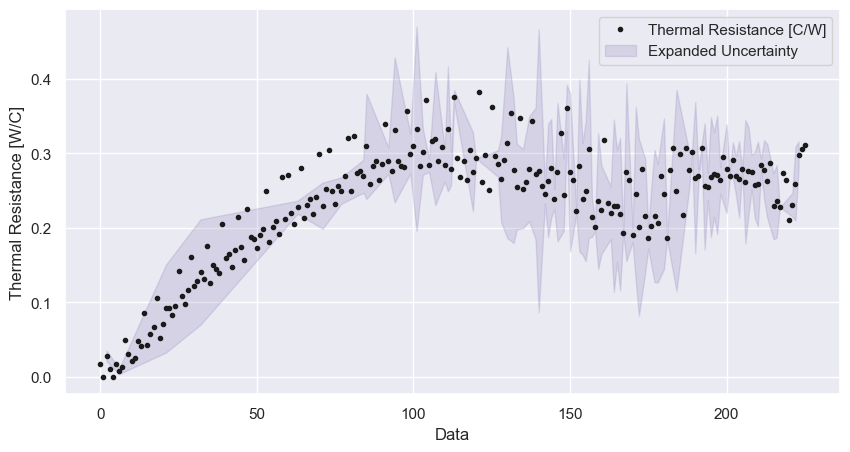

In [17]:
# thermal resistance graph with EU
plt.figure(figsize=(10,5));
plt.plot(df_mean['Resistance (oC/W)'].index, df_mean['Resistance (oC/W)'], '.k', label='Thermal Resistance [C/W]' )
idx = df_std.index
df_mean_idx = df_mean.loc[idx]
plt.fill_between(df_std['Resistance (oC/W)'].index, df_mean_idx['Resistance (oC/W)'] - 2* df_std['Resistance (oC/W)'], df_mean_idx['Resistance (oC/W)'] + 2* df_std['Resistance (oC/W)'],color='m', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Data')
plt.ylabel('Thermal Resistance [W/C]')
plt.legend()

PHP - Temperature vs Pressure

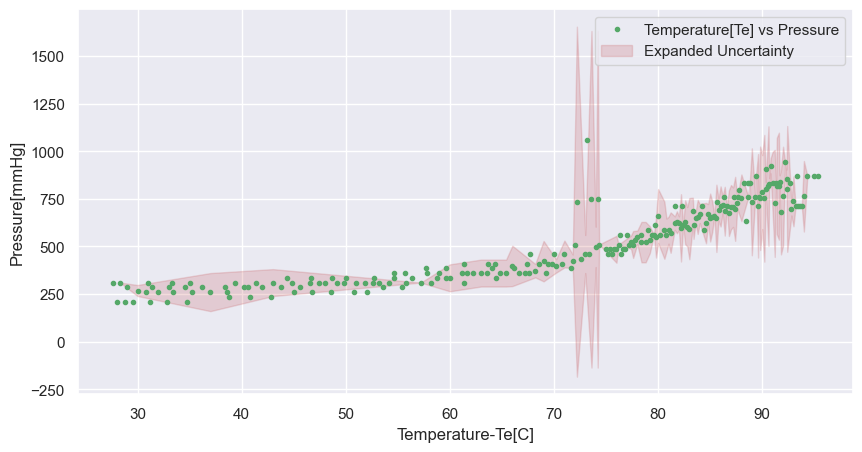

In [18]:
plt.figure(figsize=(10,5));
plt.plot(df_mean['Te - AVG (oC)'], df_mean['Pressure (mm of Hg)'],'.g', label='Temperature[Te] vs Pressure')
plt.fill_between(df_mean_idx['Te - AVG (oC)'],df_mean_idx['Pressure (mm of Hg)'] - 2* df_std['Pressure (mm of Hg)'], df_mean_idx['Pressure (mm of Hg)'] + 2* df_std['Pressure (mm of Hg)'], color='r', alpha=0.2, label='Expanded Uncertainty')
plt.xlabel('Temperature-Te[C]')
plt.ylabel('Pressure[mmHg]')
plt.legend()

PHP - Change in Gibss free energy

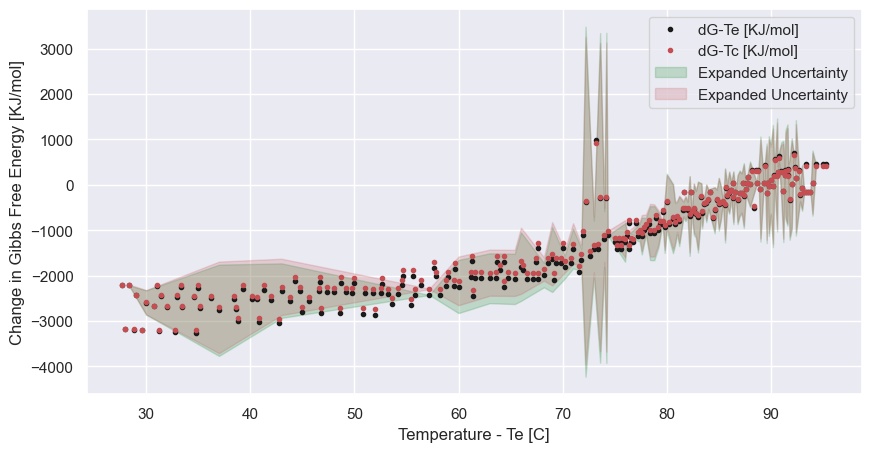

In [19]:
plt.figure(figsize=(10,5));
plt.plot(df_mean['Te - AVG (oC)'], df_mean['GFE [KJ/mol]'], '.k', label='dG-Te [KJ/mol]')
plt.plot(df_mean['Te - AVG (oC)'], df_mean['GFE_Tc [KJ/mol]'], '.r', label='dG-Tc [KJ/mol]')
plt.fill_between(df_mean_idx['Te - AVG (oC)'],df_mean_idx['GFE [KJ/mol]'] - 2* df_std['GFE [KJ/mol]'], df_mean_idx['GFE [KJ/mol]'] + 2* df_std['GFE [KJ/mol]'], color='g', alpha=0.3, label='Expanded Uncertainty')
plt.fill_between(df_mean_idx['Te - AVG (oC)'],df_mean_idx['GFE_Tc [KJ/mol]'] - 2* df_std['GFE_Tc [KJ/mol]'], df_mean_idx['GFE_Tc [KJ/mol]'] + 2* df_std['GFE_Tc [KJ/mol]'], color='r', alpha=0.2, label='Expanded Uncertainty')

plt.xlabel('Temperature - Te [C]')
plt.ylabel('Change in Gibbs Free Energy [KJ/mol]')
plt.legend()

PHP - dG

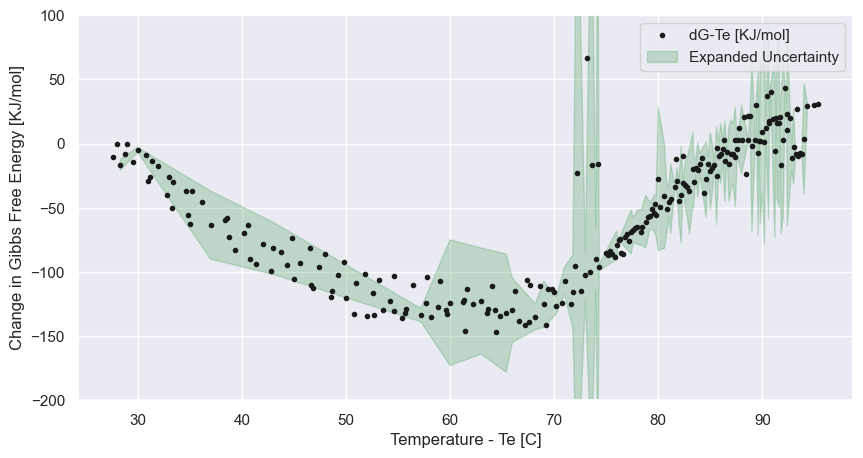

In [20]:
plt.figure(figsize=(10,5));
plt.plot(df_mean['Te - AVG (oC)'], df_mean['dG [KJ/mol]'], '.k', label='dG-Te [KJ/mol]')
plt.fill_between(df_mean_idx['Te - AVG (oC)'],df_mean_idx['dG [KJ/mol]'] - 2* df_std['dG [KJ/mol]'], df_mean_idx['dG [KJ/mol]'] + 2* df_std['dG [KJ/mol]'], color='g', alpha=0.3, label='Expanded Uncertainty')
plt.ylim(-200,100)
plt.xlabel('Temperature - Te [C]')
plt.ylabel('Change in Gibbs Free Energy [KJ/mol]')
plt.legend()

## Calculation of average EU of PHP measurement

Calculation of average uncertainty in the Tc-temperature measurement

In [21]:
# Tc - temperature average uncertainty in measurement
Tc_uncertainy = ((df_std['Tc - AVG (oC)'] / df_mean['Tc - AVG (oC)'])*100).dropna()
Tc_uncertainy_mean = Tc_uncertainy.mean()
print("Average Uncertainty for the Tc measurement {} [%]".format(round(Tc_uncertainy_mean,2)))

Average Uncertainty for the Tc measurement 3.62 [%]


Calculation of average uncertainty in the thermal resistance measurement

In [22]:
# Thermal resistance avg uncertainty calculation
TR_uncertainty = ((df_std['Resistance (oC/W)']/df_mean['Resistance (oC/W)'])*100).dropna()
TR_uncertainty_mean = TR_uncertainty.mean()
print("Average uncertainty for the Thermal Resistance measurement {} [%]".format(round(TR_uncertainty_mean,2)))

Average uncertainty for the Thermal Resistance measurement 10.94 [%]


## Calculation of average values of all properties

In [23]:
DataPropAvg(df_mean, df_std)

Tc  average:     50.562 +- 2.1346 [C]
P   average:     512.4213 +- 59.2475 [mmHg]
dT  average:     18.4649 +- 2.1346 [C]
TR  average:     0.2308 +- 0.0267 [C/W]
GFE average:     -1262.8437 +- 271.2378 [KJ/mol]



## Finding optimal condition wrt dG

In [24]:
BestTP(df_mean)

Optimal G(T,P) at lowest dG [-146.7584] of the system 
Temprature Te [C]: 64.4 
Pressure-Vacuume [mmHg]: 335.0 

